In [61]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 


In [62]:
order_detail = pd.read_csv(r"C:\Users\raksh\OneDrive\Desktop\sql pizza sales\pizza_sales\order_details.csv")
orders = pd.read_csv(r"C:\Users\raksh\OneDrive\Desktop\sql pizza sales\pizza_sales\orders.csv")
pizza_type = pd.read_csv(r"C:\Users\raksh\OneDrive\Desktop\sql pizza sales\pizza_sales\pizza_types.csv", encoding='latin1')

order_detail.head()
orders.head()
pizza_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Check Missing Values :

In [25]:
order_detail.isnull().sum()

order_details_id    0
order_id            0
pizza_type_id       0
quantity            0
dtype: int64

In [26]:
orders.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [27]:
pizza_type.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [63]:
pizza_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


# # Handle missing values


In [66]:
# Inspect data types and non-null counts
print(order_detail.info())
print(orders.info())
print(pizza_type.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_type_id     48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id

In [67]:
# Check for unique values in key columns
print(order_detail['order_id'].unique())
print(orders['order_id'].unique())
print(pizza_type['pizza_type_id'].unique())

[    1     2     3 ... 21348 21349 21350]
[    1     2     3 ... 21348 21349 21350]
['bbq_ckn' 'cali_ckn' 'ckn_alfredo' 'ckn_pesto' 'southw_ckn' 'thai_ckn'
 'big_meat' 'classic_dlx' 'hawaiian' 'ital_cpcllo' 'napolitana'
 'pep_msh_pep' 'pepperoni' 'the_greek' 'brie_carre' 'calabrese'
 'ital_supr' 'peppr_salami' 'prsc_argla' 'sicilian' 'soppressata'
 'spicy_ital' 'spinach_supr' 'five_cheese' 'four_cheese' 'green_garden'
 'ital_veggie' 'mediterraneo' 'mexicana' 'spin_pesto' 'spinach_fet'
 'veggie_veg']


In [68]:
# Ensure there are no missing or mismatched keys
print(order_detail['order_id'].isnull().sum())
print(orders['order_id'].isnull().sum())
print(order_detail['pizza_type_id'].isnull().sum())
print(pizza_type['pizza_type_id'].isnull().sum())

0
0
0
0


# Merge DataSets

In [64]:
print(order_detail.head())
print(orders.head())
print(pizza_type.head())


   order_details_id  order_id  pizza_type_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chic

In [72]:
# Merge datasets
merged_data = pd.merge(order_detail, orders, on='order_id', how='outer')
merged_data = pd.merge(merged_data, pizza_type, on='pizza_type_id', how='outer')

In [70]:
# Check the first few rows of the merged DataFrame
print(merged_data.head())

Empty DataFrame
Columns: [order_details_id, order_id, pizza_type_id, quantity, date, time, name, category, ingredients]
Index: []


In [73]:
# Verify the merged data summary
print(merged_data.describe())

       order_details_id      order_id      quantity
count      48620.000000  48620.000000  48620.000000
mean       24310.500000  10701.479761      1.019622
std        14035.529381   6180.119770      0.143077
min            1.000000      1.000000      1.000000
25%        12155.750000   5337.000000      1.000000
50%        24310.500000  10682.500000      1.000000
75%        36465.250000  16100.000000      1.000000
max        48620.000000  21350.000000      4.000000


## Data Analysis 
# Descriptive Stastistics 

In [74]:
print(merged_data.describe())

       order_details_id      order_id      quantity
count      48620.000000  48620.000000  48620.000000
mean       24310.500000  10701.479761      1.019622
std        14035.529381   6180.119770      0.143077
min            1.000000      1.000000      1.000000
25%        12155.750000   5337.000000      1.000000
50%        24310.500000  10682.500000      1.000000
75%        36465.250000  16100.000000      1.000000
max        48620.000000  21350.000000      4.000000


In [81]:
merged_data.head()

,order_details_id,order_id,pizza_type_id,quantity,date,time,name,category,ingredients
0,NaN,NaN,bbq_ckn,NaN,NaN,NaN,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,26.0,11.0,bbq_ckn_l,1.0,2015-01-01,13:02:59,NaN,NaN,NaN
2,43.0,17.0,bbq_ckn_l,1.0,2015-01-01,13:53:00,NaN,NaN,NaN
3,71.0,27.0,bbq_ckn_l,1.0,2015-01-01,15:11:17,NaN,NaN,NaN
4,83.0,33.0,bbq_ckn_l,1.0,2015-01-01,15:54:08,NaN,NaN,NaN


## Most popular pizza types and sizes using loops

In [82]:
pizza_counts = {}
for pizza in merged_data['pizza_type_id']:
    if pizza in pizza_counts:
        pizza_counts[pizza] += 1
    else:
        pizza_counts[pizza] = 1

    

# Sort pizzas by popularity

In [83]:
sorted_pizza_count= dict(sorted(pizza_counts.items(),key=lambda item:item[1],reverse=True))
print(sorted_pizza_count)

{'big_meat_s': 1811, 'thai_ckn_l': 1365, 'five_cheese_l': 1359, 'four_cheese_l': 1273, 'classic_dlx_m': 1159, 'spicy_ital_l': 1088, 'hawaiian_s': 1001, 'southw_ckn_l': 993, 'bbq_ckn_l': 967, 'bbq_ckn_m': 926, 'ital_supr_m': 920, 'pepperoni_m': 918, 'cali_ckn_m': 914, 'hawaiian_l': 896, 'cali_ckn_l': 895, 'mexicana_l': 844, 'classic_dlx_s': 786, 'pepperoni_s': 739, 'ital_supr_l': 735, 'sicilian_s': 731, 'ital_cpcllo_l': 715, 'pepperoni_l': 712, 'ckn_alfredo_m': 697, 'peppr_salami_l': 680, 'veggie_veg_m': 630, 'sicilian_l': 596, 'green_garden_s': 593, 'prsc_argla_m': 585, 'four_cheese_m': 577, 'pep_msh_pep_s': 570, 'sicilian_m': 560, 'spinach_fet_m': 558, 'napolitana_l': 557, 'calabrese_m': 554, 'the_greek_xl': 544, 'southw_ckn_m': 526, 'cali_ckn_s': 493, 'ital_veggie_m': 483, 'brie_carre_s': 480, 'bbq_ckn_s': 479, 'thai_ckn_s': 476, 'thai_ckn_m': 474, 'hawaiian_m': 473, 'classic_dlx_l': 471, 'napolitana_s': 468, 'veggie_veg_s': 457, 'mexicana_m': 452, 'spinach_fet_l': 437, 'spinach_fet_

## Order patterns over time

In [84]:
orders['date'] = pd.to_datetime(orders['date'])
order_trends = orders.groupby(orders['date'].dt.to_period('M')).size()
print(order_trends)

date
2015-01    1845
2015-02    1685
2015-03    1840
2015-04    1799
2015-05    1853
2015-06    1773
2015-07    1935
2015-08    1841
2015-09    1661
2015-10    1646
2015-11    1792
2015-12    1680
Freq: M, dtype: int64


# Visualization :

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

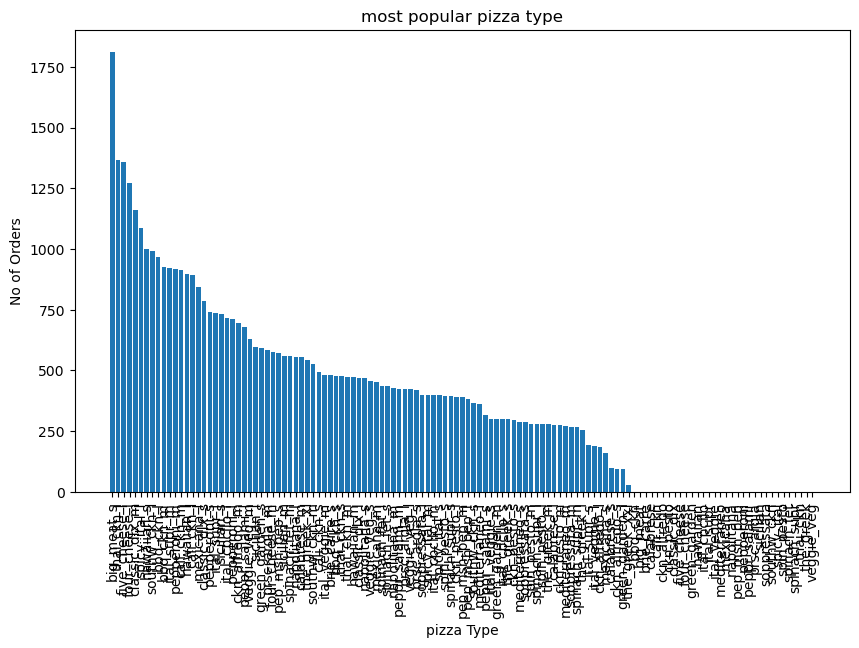

In [86]:
# Popular Pizza type

plt.figure(figsize=(10,6))
plt.bar(sorted_pizza_count.keys(),sorted_pizza_count.values())
plt.title("most popular pizza type")
plt.xlabel("pizza Type")
plt.ylabel("No of Orders")
plt.xticks(rotation=90)
plt.show()

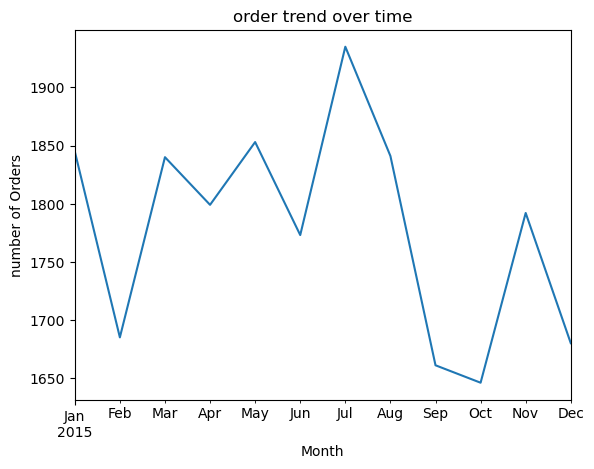

In [88]:
# Order trends over time

order_trends.plot(kind = "line")
plt.title("order trend over time")
plt.xlabel("Month")
plt.ylabel("number of Orders")
plt.show()

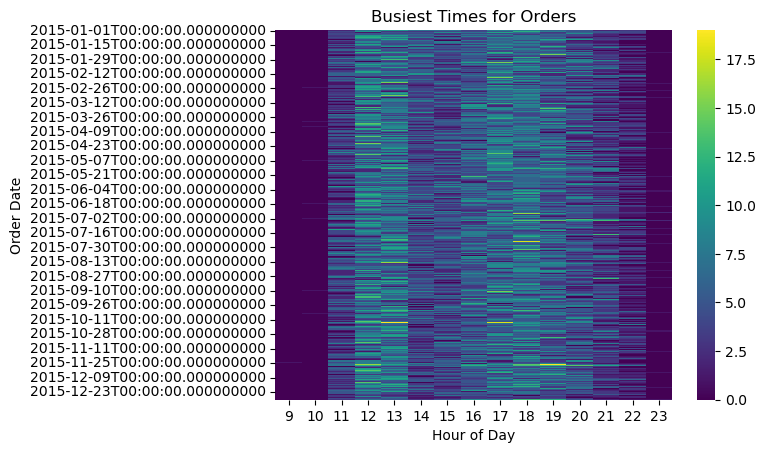

In [91]:

# Heatmap of busiest times


orders['time'] = pd.to_datetime(orders['time'])
orders['hour'] = orders['time'].dt.hour
hourly_orders = orders.groupby(['date', 'hour']).size().unstack(fill_value=0)
sns.heatmap(hourly_orders, cmap='viridis')
plt.title('Busiest Times for Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Order Date')
plt.show()

# predictive Analysis 

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
# Prepare data for Predication

orders['month'] = orders["date"].dt.to_period("M")
montly_sales = orders.groupby("month").size().reset_index(name = "sales")

X = montly_sales["month"].apply(lambda x: x.ordinal).values.reshape(-1,1)
y = montly_sales["sales"]

In [101]:
# Split Data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
# Train Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predict next month sales 

next_month = montly_sales["month"].max().ordinal + 1
predicted_sales =  model.predict([[next_month]])

print(f"Predicted sales for next month: {predicted_sales[0]}")

Predicted sales for next month: 1733.9818435754178


In [107]:
orders['date'] = pd.to_datetime(orders['date'])
order_trends = orders.groupby(orders['date'].dt.to_period('M')).size()
print(order_trends,f"Predicted sales for next month: {predicted_sales[0]}")

date
2015-01    1845
2015-02    1685
2015-03    1840
2015-04    1799
2015-05    1853
2015-06    1773
2015-07    1935
2015-08    1841
2015-09    1661
2015-10    1646
2015-11    1792
2015-12    1680
Freq: M, dtype: int64 Predicted sales for next month: 1733.9818435754178


# Reporting

In [110]:
report = f"""
Pizza Sales Analysis Report

1. Data Overview:
   - Number of orders: {len(orders)}
   - Number of unique pizza types: {pizza_type['pizza_type_id'].nunique()}

2. Most Popular Pizza Types:
   {list(sorted_pizza_count.items())[:5]}

3. Order Trends Over Time:
   {order_trends}

4. Predictive Analysis:
   - Predicted sales for next month: {predicted_sales[0]}

5. Visualizations:
   - Please refer to the generated plots.
"""

with open('pizza_sales_report.txt', 'w') as file:
    file.write(report)

print("Report generated: pizza_sales_report.txt")


Report generated: pizza_sales_report.txt


In [112]:
# Write data to the file
with open('pizza_sales_report.txt', 'w') as file:
    file.write(report)

print("Report generated: pizza_sales_report.txt")

Report generated: pizza_sales_report.txt
